In [17]:
import h5py
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sys.path.append('/eagle/MDClimSim/mjp5595/ml4dvar/stormer/')
from stormer_utils_pangu import StormerWrapperPangu
from varsStormer import varsStormer

sys.path.append('/eagle/MDClimSim/mjp5595/ml4dvar/')
sys.path.append('/eagle/MDClimSim/mjp5595/ml4dvar/src')
from obs_cummulative import *

/home/mjp5595/.conda/envs/climaX/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")
/home/mjp5595/.conda/envs/climaX/lib/python3.8/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [2]:
def read_era5(data,vars_stormer):
    data_np = np.zeros((len(vars_stormer),128,256))
    for i,var in enumerate(vars_stormer):
        data_np[i] = data['input/{}'.format(var)][:]
    return data_np

vars_stormer = varsStormer().vars_stormer
vars_units = varsStormer().var_units

In [10]:
irga_obs = h5py.File("/eagle/MDClimSim/mjp5595/ml4dvar/obs/igra_141520_stormer_obs_standardized_360_3.hdf5")

temp_vals = irga_obs['2014/01/01/00/2m_temperature'][:]
h_idxs = irga_obs['2014/01/01/00/2m_temperature_H'][:,0]
h_obs = irga_obs['2014/01/01/00/2m_temperature_H'][:,1]

In [11]:
print('temp_vals[:,0] (lat) shape/min/max : {}/{}/{}'.format(temp_vals[:,0].shape,np.min(temp_vals[:,0]),np.max(temp_vals[:,0])))
print('temp_vals[:,1] (lon) shape/min/max : {}/{}/{}'.format(temp_vals[:,1].shape,np.min(temp_vals[:,1]),np.max(temp_vals[:,1])))
print('temp_vals[:,2] (val) shape/min/max : {}/{}/{}'.format(temp_vals[:,2].shape,np.min(temp_vals[:,2]),np.max(temp_vals[:,2])))
print('h_idxs shape/min/max : {}/{}/{}'.format(h_idxs.shape,np.min(h_idxs),np.max(h_idxs)))
print('h_obs shape/min/max : {}/{}/{}'.format(h_obs.shape,np.min(h_obs),np.max(h_obs)))

temp_vals[:,0] (lat) shape/min/max : (585,)/-77.85/82.5
temp_vals[:,1] (lon) shape/min/max : (585,)/0.31689999999997553/358.1183
temp_vals[:,2] (val) shape/min/max : (585,)/-2.5862019583703333/1.5012732172549814
h_idxs shape/min/max : (2340,)/2166.0/31700.0
h_obs shape/min/max : (2340,)/8.256790123450179e-05/0.9815403456790183


In [12]:
print('h_idxs[:4] :',h_idxs[:4])
h_idxs_unraveled = np.unravel_index(h_idxs[:4].astype('int'),(128,256))
print('h_idxs_unraveled :',h_idxs_unraveled)
print('h_obs[:4] :',h_obs[:4])
print('sum(h_obs[:4]) :',np.sum(h_obs[:4]))

h_idxs[:4] : [2166. 2422. 2167. 2423.]
h_idxs_unraveled : (array([8, 9, 8, 9]), array([118, 118, 119, 119]))
h_obs[:4] : [0.41405369 0.06740409 0.44594631 0.07259591]
sum(h_obs[:4]) : 1.0


In [13]:
# Rewrote this in ERA5_dense_obs.py
#
#import torch
#
#irga_obs = h5py.File("/eagle/MDClimSim/mjp5595/ml4dvar/obs/igra_141520_stormer_obs_standardized_360_3.hdf5")
#
#era5_dir = '/eagle/MDClimSim/tungnd/data/wb2/1.40625deg_from_full_res_1_step_6hr_h5df/train/'
#era5_2020_dir = '/eagle/MDClimSim/tungnd/data/wb2/1.40625deg_from_full_res_1_step_6hr_h5df/test/'
#
#lats = np.linspace(-90,90,128)
#lons = np.linspace(0,360,256)
#
#means = np.load('/eagle/MDClimSim/tungnd/data/wb2/1.40625deg_from_full_res_1_step_6hr_h5df/normalize_mean.npz')
#stds = np.load('/eagle/MDClimSim/tungnd/data/wb2/1.40625deg_from_full_res_1_step_6hr_h5df/normalize_std.npz')
#
##era5_obs = h5py.File('/eagle/MDClimSim/mjp5595/ml4dvar/data/era5_obs.h5', 'a')
#with h5py.File('/eagle/MDClimSim/mjp5595/ml4dvar/obs/era5_obs.h5', 'w') as era5_obs:
#    for year in ['2014','2015','2020']:
#        yr_grp = era5_obs.require_group(year)
#        year_hr_idx = 0
#        for month in list(irga_obs['{}'.format(year)].keys()):
#            mth_grp = era5_obs['{}'.format(year)].require_group(str(month))
#            for day in list(irga_obs['{}/{}'.format(year,month)].keys()):
#                day_grp = era5_obs['{}/{}'.format(year,month)].require_group(day)
#                for hour in list(irga_obs['{}/{}/{}'.format(year,month,day)].keys()):
#                    if int(hour) % 6 != 0:
#                        continue
#
#                    print('{}/{}/{}/{} - {:0>4d}'.format(year,month,day,hour,year_hr_idx))
#                    hr_group = era5_obs['{}/{}/{}'.format(year,month,day)].require_group(hour)
#
#                    # load era5
#                    if year == '2014' or year == '2015':
#                        try:
#                            era5_data = torch.from_numpy(read_era5(h5py.File(os.path.join(era5_dir,'{}_{:0>4d}.h5'.format(year,year_hr_idx))),vars_stormer))
#                        except:
#                            continue
#                    else:
#                        try:
#                            era5_data = torch.from_numpy(read_era5(h5py.File(os.path.join(era5_2020_dir,'{}_{:0>4d}.h5'.format(year,year_hr_idx))),vars_stormer))
#                        except:
#                            continue
#                    year_hr_idx += 1
#
#                    for var_idx,var in enumerate(vars_stormer):
#                        if var_idx != 0:
#                            continue
#
#                        era5_var_data = []
#                        era5_var_data_H = []
#                        for row in range(127):
#                            for col in range(255):
#                                era5_var_loc_data = era5_data[var_idx,row,col] \
#                                    + era5_data[var_idx,row+1,col] \
#                                    + era5_data[var_idx,row,col+1] \
#                                    + era5_data[var_idx,row+1,col+1]
#                                era5_var_loc_data = era5_var_loc_data / 4.
#                                era5_var_loc_data_lat = (row+1)*(180./128.) - 90.
#                                era5_var_loc_data_lon = (col+1)*(360./256.)
#                                era5_var_data.append([era5_var_loc_data_lat,
#                                                      era5_var_loc_data_lon,
#                                                      era5_var_loc_data])
#
#                                era5_var_loc_data_H_idx = np.zeros(4)
#                                era5_var_loc_data_H_idx[0] = np.ravel_multi_index([row,col],(128,256))
#                                era5_var_loc_data_H_idx[1] = np.ravel_multi_index([row+1,col],(128,256))
#                                era5_var_loc_data_H_idx[2] = np.ravel_multi_index([row,col+1],(128,256))
#                                era5_var_loc_data_H_idx[3] = np.ravel_multi_index([row+1,col+1],(128,256))
#                                era5_var_loc_data_H_obs = np.array([0.25,0.25,0.25,0.25])
#                                era5_var_data_H.extend(np.stack((era5_var_loc_data_H_idx,
#                                                                era5_var_loc_data_H_obs),
#                                                                axis=1)
#                                )
#
#                                #print()
#                                #print('col :',col)
#                                #print('era5_var_data :',era5_var_data)
#                                #print('era5_var_data_H[-4:] :',era5_var_data_H[-4:])
#
#                        era5_var_data = np.array(era5_var_data)
#                        era5_var_data_H = np.array(era5_var_data_H)
#                        #print('era5_var_data.shape :',era5_var_data.shape)
#                        #print('era5_var_data_H.shape :',era5_var_data_H.shape)
#                        era5_var_data[:,2] = (era5_var_data[:,2] - means[var]) / stds[var]
#
#                        #print()
#                        #print('era5_var_data :',era5_var_data)
#                        #print('era5_var_data_H :',era5_var_data_H)
#
#                        era5_obs_dataset = era5_obs['{}/{}/{}/{}'.format(year,month,day,hour)].create_dataset(
#                            '{}'.format(var), data=era5_var_data, dtype = 'f8'
#                        )
#                        era5_obs_dataset_H = era5_obs['{}/{}/{}/{}'.format(year,month,day,hour)].create_dataset(
#                            '{}_H'.format(var), data=era5_var_data_H, dtype = 'f8'
#                        )

In [41]:
idxs_to_use = [[y, x] for x in np.arange(0,256,4) for y in np.arange(0,128,4)]
idxs_to_use = np.array(idxs_to_use)
raveled_idxs = np.ravel_multi_index((idxs_to_use[:,0],idxs_to_use[:,1]),(128,256))
raveled_idxs_H = raveled_idxs*4
offsets = np.arange(4)
raveled_idxs_H = raveled_idxs_H[:,np.newaxis] + offsets
raveled_idxs_H = raveled_idxs_H.flatten()

### Combine Individual Variables Obs Files into one Obs h5 Dataset

In [1]:
import h5py
import os

dense_obs_dir = '/eagle/MDClimSim/mjp5595/ml4dvar/obs/'
dense_obs_prefix = 'era5_dense_grid_2014'
#dense_obs_combined = h5py.File(os.path.join(dense_obs_dir,'era5_obs_dense_2014.h5'),'w')
with h5py.File(os.path.join(dense_obs_dir,'era5_4cell_grid_2014.h5'),'w') as dense_obs_combined:
    # There are 69 vars for stormer
    for i in range(69):
        #dense_obs_var_data = h5py.File(os.path.join(dense_obs_dir,dense_obs_prefix+'-{}.h5'.format(i)),'r')
        with h5py.File(os.path.join(dense_obs_dir,dense_obs_prefix+'-{}.h5'.format(i)),'r') as dense_obs_var_data:

            for year in ['2014']:
                yr_grp = dense_obs_combined.require_group(year)
                for month in list(dense_obs_var_data['{}'.format(year)].keys()):
                    mth_grp = dense_obs_combined['{}'.format(year)].require_group(str(month))
                    for day in list(dense_obs_var_data['{}/{}'.format(year,month)].keys()):
                        day_grp = dense_obs_combined['{}/{}'.format(year,month)].require_group(day)
                        for hour in list(dense_obs_var_data['{}/{}/{}'.format(year,month,day)].keys()):
                            if int(hour) % 6 != 0:
                                continue
                            if int(month) > 4:
                                continue
                            
                            hour_grp = dense_obs_combined['{}/{}/{}'.format(year,month,day)].require_group(hour)
                            for var_key in dense_obs_var_data['{}/{}/{}/{}'.format(year,month,day,hour)].keys():
                                #var_grp = dense_obs_combined['{}/{}/{}/{}'.format(year,month,day,hour)].require_group(var_key)
                                var_data = dense_obs_var_data['{}/{}/{}/{}/{}'.format(year,month,day,hour,var_key)][:]

                                if '_H' in var_key:
                                    var_data = var_data[raveled_idxs_H]
                                else:
                                    var_data = var_data[raveled_idxs]

                                print('{}/{}/{}/{}/{} - {}'.format(year,month,day,hour,var_key,var_data.shape))
                                var_dataset = dense_obs_combined['{}/{}/{}/{}'.format(year,month,day,hour)].create_dataset(
                                    '{}'.format(var_key), data=var_data, dtype = 'f8'
                                )

2014/01/01/00/2m_temperature - (32768, 3)
2014/01/01/00/2m_temperature_H - (131072, 2)
2014/01/01/06/2m_temperature - (32768, 3)
2014/01/01/06/2m_temperature_H - (131072, 2)
2014/01/01/12/2m_temperature - (32768, 3)
2014/01/01/12/2m_temperature_H - (131072, 2)
2014/01/01/18/2m_temperature - (32768, 3)
2014/01/01/18/2m_temperature_H - (131072, 2)
2014/01/02/00/2m_temperature - (32768, 3)
2014/01/02/00/2m_temperature_H - (131072, 2)
2014/01/02/06/2m_temperature - (32768, 3)
2014/01/02/06/2m_temperature_H - (131072, 2)
2014/01/02/12/2m_temperature - (32768, 3)
2014/01/02/12/2m_temperature_H - (131072, 2)
2014/01/02/18/2m_temperature - (32768, 3)
2014/01/02/18/2m_temperature_H - (131072, 2)
2014/01/03/00/2m_temperature - (32768, 3)
2014/01/03/00/2m_temperature_H - (131072, 2)
2014/01/03/06/2m_temperature - (32768, 3)
2014/01/03/06/2m_temperature_H - (131072, 2)
2014/01/03/12/2m_temperature - (32768, 3)
2014/01/03/12/2m_temperature_H - (131072, 2)
2014/01/03/18/2m_temperature - (32768, 3)
2

In [3]:
dense_obs_combined = h5py.File(os.path.join(dense_obs_dir,'era5_obs_dense_2014.h5'),'r')

In [4]:
dense_obs_combined.keys()

<KeysViewHDF5 ['2014']>

In [4]:
dense_obs_combined = h5py.File('/eagle/MDClimSim/mjp5595/ml4dvar/obs/era5_obs_grid_2014.h5')
print('hours :',dense_obs_combined['2014/01/01'].keys())
print('len(keys) :',len(dense_obs_combined['2014/01/01/00'].keys()))
print('shape :',dense_obs_combined['2014/01/01/00/2m_temperature'].shape)

hours : <KeysViewHDF5 ['00', '06', '12', '18']>
len(keys) : 138
shape : (32385, 3)


In [8]:
temp_obs = dense_obs_combined['2014/01/01/00/2m_temperature']
temp_obs_H = dense_obs_combined['2014/01/01/00/2m_temperature_H']
print('temp_obs.shape :',temp_obs.shape)
print('temp_obs_H.shape :',temp_obs_H.shape)

temp_obs.shape : (32385, 3)
temp_obs_H.shape : (129540, 2)


In [16]:
print('indices in last row must be <= {}'.format((256*127)-1))
print('highest possible idx {}'.format(256*128))
print()
# temp_obs is (lat,lon,val)
# temp_obs_H is ([[idx0,idx1,idx2,idx3],[w0,w1,w2,w3]]) # idx-> flattened idx, w-> weight
print('temp_obs[0] :',temp_obs[0])
print('temp_obs_H[0:4] :',temp_obs_H[0:4])
#
print()
#
print('temp_obs[-1] :',temp_obs[-1])
print('temp_obs_H[-4:] :',temp_obs_H[-4:])

indices in last row must be <= 32511
highest possible idx 32768

temp_obs[0] : [-88.59375      1.40625     -1.35126054]
temp_obs_H[0:4] : [[  0.   1.]
 [256.   0.]
 [  1.   0.]
 [257.   0.]]

temp_obs[-1] : [ 88.59375    358.59375     -1.42476137]
temp_obs_H[-4:] : [[3.2510e+04 1.0000e+00]
 [3.2766e+04 0.0000e+00]
 [3.2511e+04 0.0000e+00]
 [3.2767e+04 0.0000e+00]]


In [17]:
a = np.load('/eagle/MDClimSim/mjp5595/data/stormer/var3d_denseERA5Obs_BINF/data/analysis_0_1201012014.npy')
print('a.shape :',a.shape)

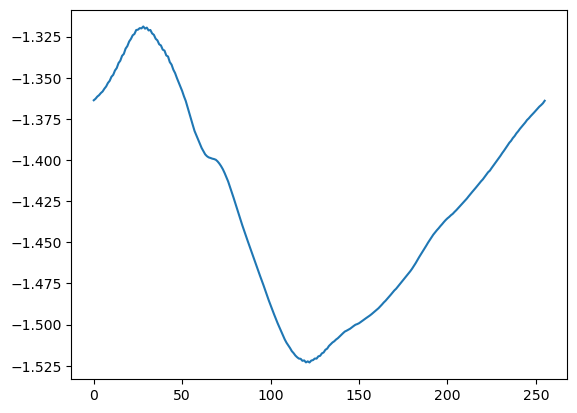

In [20]:
plt.plot(a[0,0,0,:])

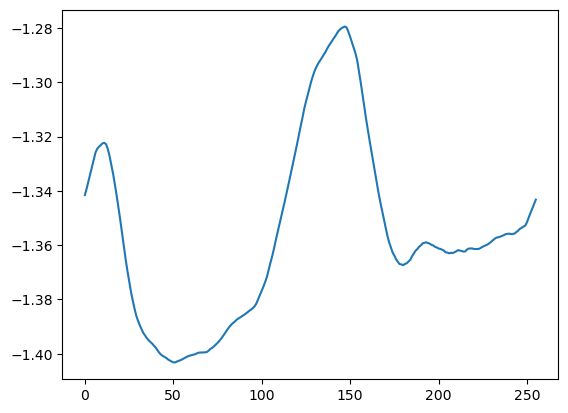

In [21]:
plt.plot(a[0,0,-1,:])

In [38]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

b_err = np.load('/eagle/MDClimSim/mjp5595/ml4dvar/stormer/data/sh_stormer_12hrPred_24hrNMC_00.npy')

In [39]:
print('b_err.shape :',b_err.shape)
print('min(b_err) :',np.min(b_err))
print('argmin(b_err) :',np.argmin(b_err))

b_err.shape : (69, 128)
min(b_err) : 0.0
argmin(b_err) : 5248


In [45]:
zero_locs = np.where(b_err == 0,1,0)
zero_args = np.argwhere(b_err==0)

In [47]:
print('len(zero_args) :',len(zero_args))
print('zero_args :',zero_args)

len(zero_args) : 28
zero_args : [[41  0]
 [42  0]
 [43  0]
 [44  0]
 [45  0]
 [46  0]
 [47  0]
 [48  0]
 [49  0]
 [50  0]
 [51  0]
 [52  0]
 [53  0]
 [54  0]
 [55  0]
 [56  0]
 [57  0]
 [58  0]
 [59  0]
 [60  0]
 [61  0]
 [62  0]
 [63  0]
 [64  0]
 [65  0]
 [66  0]
 [67  0]
 [68  0]]


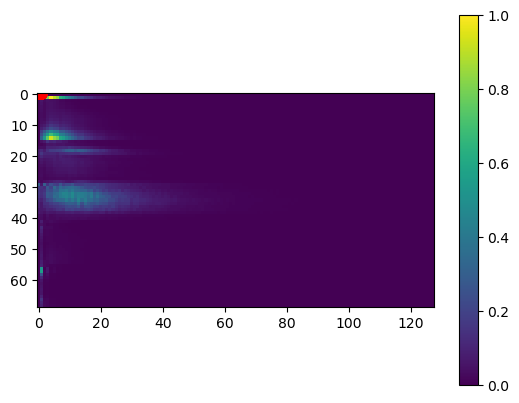

In [41]:
plt.imshow(b_err)
plt.scatter(zero_locs[:,0],zero_locs[:,1],c='r')
plt.colorbar()

In [49]:
b_err[68,0]

0.0

In [13]:
b_err[1,0]

6.496133244359823e-05

In [22]:
a = np.load('/eagle/MDClimSim/mjp5595/ml4dvar/data/normalize_mean.npz')
vars_stormer = varsStormer().vars_stormer

uwind_idxs = [i for i, var in enumerate(vars_stormer) if 'u_component_of_wind' in var]
vwind_idxs = [i for i, var in enumerate(vars_stormer) if 'v_component_of_wind' in var]
nowind_idxs = [i for i, var in enumerate(vars_stormer) if 'u_component_of_wind' not in var and \
               'v_component_of_wind' not in var]

In [25]:
print('len(uwind_idxs), uwind_idxs :',len(uwind_idxs),uwind_idxs)
print('len(vwind_idxs) vwind_idxs :',len(vwind_idxs),vwind_idxs)
print('len(nowind_idxs) nowind_idxs :',len(nowind_idxs),nowind_idxs)

len(uwind_idxs), uwind_idxs : 14 [1, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
len(vwind_idxs) vwind_idxs : 14 [2, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42]
len(nowind_idxs) nowind_idxs : 41 [0, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68]


In [24]:
len(a.keys())

109

In [37]:
a['2m_temperature']
a['10m_u_component_of_wind']

array([-0.05103407], dtype=float32)

In [35]:
means = [a[var][0] for var in vars_stormer]

In [36]:
means

[278.5063,
 -0.05103407,
 0.19089237,
 100956.625,
 199370.66,
 157642.58,
 133142.84,
 115331.95,
 101225.07,
 89415.836,
 69981.484,
 54116.0,
 40648.645,
 28928.865,
 13749.328,
 7014.2383,
 737.03357,
 5.6205482,
 10.282466,
 13.5410795,
 14.208273,
 13.345026,
 11.800298,
 8.817476,
 6.563136,
 4.813061,
 3.3425775,
 1.4179757,
 0.6194869,
 -0.032548152,
 0.0033811717,
 0.012909442,
 -0.037957262,
 -0.0463831,
 -0.031233579,
 -0.024455091,
 -0.019135654,
 -0.024604397,
 -0.027493661,
 0.022025427,
 0.14378756,
 0.2056828,
 0.1883615,
 212.46904,
 208.39278,
 213.31348,
 218.05826,
 222.77426,
 228.87564,
 242.14445,
 252.95572,
 261.1403,
 267.40295,
 274.56662,
 277.3657,
 281.02542,
 2.6788418e-06,
 2.6347232e-06,
 5.259701e-06,
 1.94257e-05,
 5.779301e-05,
 0.0001275265,
 0.00038615544,
 0.0008540096,
 0.0015427442,
 0.0024342467,
 0.0045769056,
 0.0060348148,
 0.0070316023]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sh_coeffs = np.load('/eagle/MDClimSim/mjp5595/ml4dvar/stormer/data/sh_coeffs_m0_complex.npy')
print('sh_coeffs shape/min/mean/max : {}/{}/{}/{}'.format(sh_coeffs.shape,np.min(sh_coeffs),np.mean(sh_coeffs),np.max(sh_coeffs)))

sh_var_norm = np.var(sh_coeffs[:], axis = 0)
print('sh_var_norm shape/min/mean/max : {}/{}/{}/{}'.format(sh_var_norm.shape,np.min(sh_var_norm),np.mean(sh_var_norm),np.max(sh_var_norm)))

zero_locs = np.argwhere(sh_var_norm==0)
print('len(zero_locs) :',len(zero_locs))
print(zero_locs)

sh_coeffs shape/min/mean/max : (364, 69, 128)/(-2.3634354331851695+0j)/(0.00011603488119097222+0j)/(2.162906563931814+0j)
sh_var_norm shape/min/mean/max : (69, 128)/0.0/0.0011082742216472266/0.38218847302749737
len(zero_locs) : 28
[[41  0]
 [42  0]
 [43  0]
 [44  0]
 [45  0]
 [46  0]
 [47  0]
 [48  0]
 [49  0]
 [50  0]
 [51  0]
 [52  0]
 [53  0]
 [54  0]
 [55  0]
 [56  0]
 [57  0]
 [58  0]
 [59  0]
 [60  0]
 [61  0]
 [62  0]
 [63  0]
 [64  0]
 [65  0]
 [66  0]
 [67  0]
 [68  0]]


/home/mjp5595/.conda/envs/climaX/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


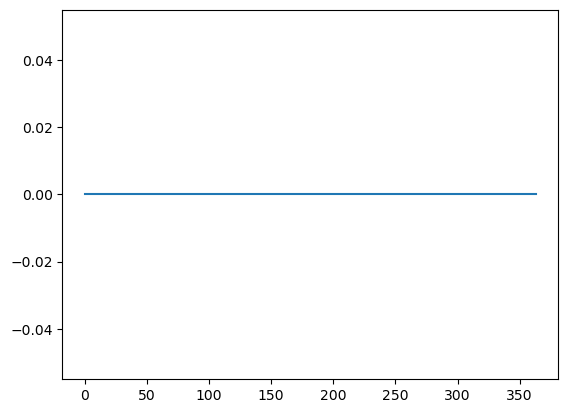

In [33]:
plt.plot(sh_coeffs[:,41,0])

In [2]:
hf_diff = np.load('/eagle/MDClimSim/mjp5595/ml4dvar/stormer/data/hf_diff.npy')
print('hf_diff.shape :',hf_diff.shape)

hf_diff_mean = np.mean(hf_diff,axis=0)
print('hf_diff_mean.shape :',hf_diff_mean.shape)

hf_diff.shape : (364, 69, 128, 256)
hf_diff_mean.shape : (69, 128, 256)


Text(0.5, 1.0, 'Reconstruction Loss (HF_err)\n2m_temperature')

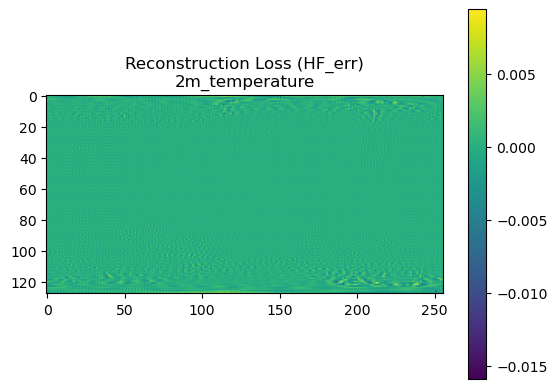

In [3]:
plt.imshow(hf_diff_mean[0])
plt.colorbar()
plt.title('Reconstruction Loss (HF_err)\n2m_temperature')

Text(0.5, 1.0, 'Reconstruction Loss (HF_err)\n10m_u_component_of_wind')

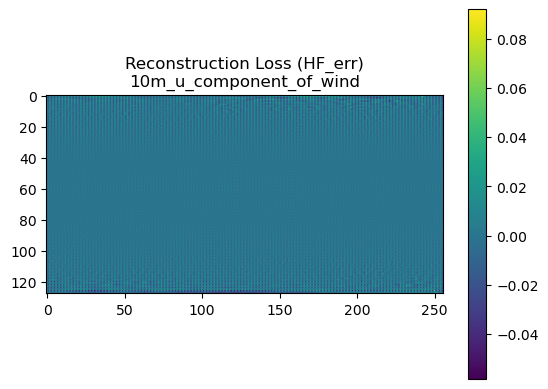

In [4]:
plt.imshow(hf_diff_mean[41])
plt.colorbar()
plt.title('Reconstruction Loss (HF_err)\n10m_u_component_of_wind')

In [23]:
mmm = []
for var_idx in range(69):
    var_min = np.min(np.real(sh_coeffs[:,var_idx,:]))
    var_mean = np.mean(np.real(sh_coeffs[:,var_idx,:]))
    var_max = np.max(np.real(sh_coeffs[:,var_idx,:]))
    var_var = np.var(np.real(sh_coeffs[:,var_idx,:]))
    mmm.append([var_min,var_mean,var_max,var_var])
mmm = np.array(mmm)

In [24]:
np.min(mmm[:,3])

3.0177433029536063e-05

In [25]:
variance = []
for var_idx in range(69):
    var_var = []
    for mmode in range(128):
        var = np.var(np.real(sh_coeffs[:,var_idx,mmode]))
        var_var.append(var)
    variance.append(var_var)
variance = np.array(variance)

In [26]:
print('variance.shape :',variance.shape)
print('variance min/mean/max:',np.min(variance),np.mean(variance),np.max(variance))

variance.shape : (69, 128)
variance min/mean/max: 0.0 0.0011082742216472266 0.38218847302749737


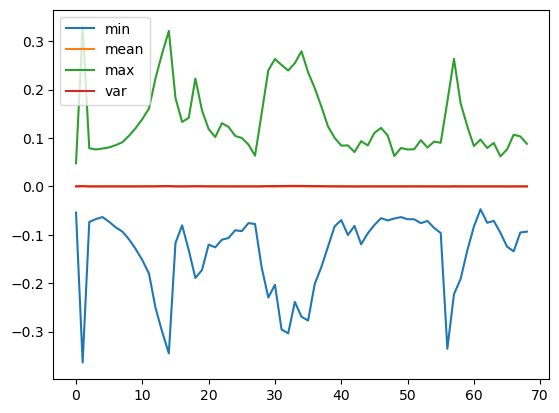

In [10]:
plt.plot(np.arange(69),mmm[:,0],label='min')
plt.plot(np.arange(69),mmm[:,1],label='mean')
plt.plot(np.arange(69),mmm[:,2],label='max')
plt.plot(np.arange(69),mmm[:,3],label='var')
plt.legend()

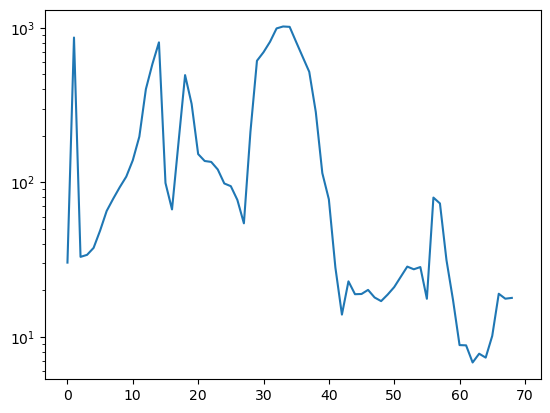

In [17]:
plt.plot(1e6*mmm[:,3])
plt.yscale('log')
plt.hlines(0,0,69)